In [ ]:
import cv2
import numpy as np
from skimage import measure, metrics,io,img_as_float
from sewar import full_ref
import imquality.brisque as brisque
import PIL.Image
from skimage.color import rgb2gray
from skimage.metrics import peak_signal_noise_ratio


v:\work\anaconda1\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,
C:\Users\15695\AppData\Roaming\Python\Python311\site-packages\libsvm\svm.py:148: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @jit


## **Use Brisque to assess the image quality**

__What is Brisque:__

Brisque is a dubbed blind/referenceless (NR) image spatial quality evaluator. BRISQUE does not calculate distortion-specific features like ringing or blur. Instead, it quantifies potential losses of "naturalness" in the image caused by distortions using scene statistics of locally normalized luminance coefficients, thereby leading to a holistic measure of quality. The underlying features are derived from the empirical distribution of locally normalized luminances and products of locally normalized luminances under a spatial natural scene statistic model. Because this method doesn’t transform the data to another coordinate frame (such as DCT, wavelet, etc.), it is different from the prior blind/no-reference image quality assessment methods.  

You can find a further introduction by this report: https://doi.org/10.1109/tip.2012.2214050

And here is link of the code:https://pypi.org/project/image-quality/

__Attention:__

Before using Brisque, you should comment out "self.image = skimage.color.rgb2gray(self.image)" in brisque.py. And then you can use it.


__Install the image-quality:__

In [ ]:
#pip install image-quality

__Path of the image :__

In [ ]:
#the name of folders of each scene
scene1_path = r'C:\Users\15695\Desktop\study\data challenge\code\final code\scene1'
scene2_path = r'C:\Users\15695\Desktop\study\data challenge\code\final code\scene2'
scene3_path = r'C:\Users\15695\Desktop\study\data challenge\code\final code\scene3'


#task name of the files
task1_path = r'Task1'
task2_path = r'Task2'
task3_path = r'Task3'

task_list = [task1_path,task2_path,task3_path]



In [ ]:

def get_Brisque_score(image_path):
    """
    Assess the image quality by using BRISQUE (Blind/Referenceless Image Spatial Quality Evaluator).

    Parameters:
    image_path : str
        The path to the input image file.

    Returns:
    float
        The BRISQUE score of the image.

    Raises:
    FileNotFoundError
        If the image file is not found.
    """
    #read the image and convert it into a gray image, because Brisque only works on the gray image.
    gray_image = PIL.Image.open(image_path).convert('L')
    gray_image = np.array(gray_image)
    score = brisque.score(gray_image)
    return score

Compute the Brisque score of scene1 with three tasks

In [ ]:
#create a dictionary to store the score of scene1 for different tasks
scene1_quality_dic = {'Task1':0,'Task2':0,'Task3':0}

for task in task_list:
    image_path = scene1_path + '\\'+ task + '.png'
    scene1_quality_dic[task] = get_Brisque_score(image_path)

print(scene1_quality_dic)

Compute the Brisque score of scene2 with three tasks

In [ ]:
#create a dictionary to store the score of scene2 for different tasks
scene2_quality_dic = {'Task1':0,'Task2':0,'Task3':0}

for task in task_list:
    image_path = scene2_path + '\\'+ task + '.png'
    scene2_quality_dic[task] = get_Brisque_score(image_path)

print(scene2_quality_dic)

Compute the Brisque score of scene3 with three tasks

In [ ]:
#create a dictionary to store the score of scene3 for different tasks
scene3_quality_dic = {'Task1':0,'Task2':0,'Task3':0}

for task in task_list:
    image_path = scene3_path + '\\'+ task + '.png'
    scene2_quality_dic[task] = get_Brisque_score(image_path)

print(scene3_quality_dic)

Show the Brisque score we get.

In [ ]:
print("The quality of scene 1 for different tasks:")
print(scene1_quality_dic)
print("The quality of scene 2 for different tasks:")
print(scene2_quality_dic)
print("The quality of scene 3 for different tasks:")
print(scene3_quality_dic)

The quality of scene 1 for different tasks:
{'Task_1': 62.10509939869141, 'Task_2': 62.78910405446035, 'Task_3': 64.1022374818975}
The quality of scene 2 for different tasks:
{'Task_1': 61.041905964858614, 'Task_2': 62.05717652122573, 'Task_3': 62.86481614269266}
The quality of scene 3 for different tasks:
{'Task_1': 62.782858370372395, 'Task_2': 63.98777935205075, 'Task_3': 63.09883433368415}


In [ ]:
import matplotlib.pyplot as plt

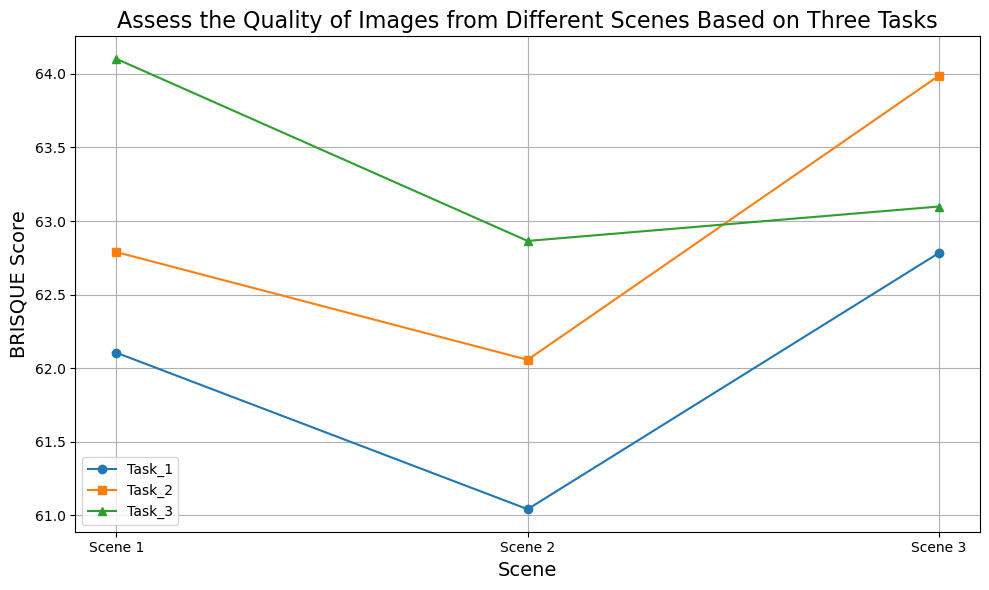

In [ ]:
tasks = list(scene1_quality_dic.keys())  # get the key name of the scene quality dictionary
scenes = ['Scene 1', 'Scene 2', 'Scene 3']

# extract the score of three scenes images under different tasks
scene1_data = [scene1_quality_dic[task] for task in tasks]
scene2_data = [scene2_quality_dic[task] for task in tasks]
scene3_data = [scene3_quality_dic[task] for task in tasks]

# plot the line chart
plt.figure(figsize=(10, 6))
markers = ['o', 's', '^']

for i, task in enumerate(tasks):
    plt.plot(scenes, [scene1_data[i], scene2_data[i], scene3_data[i]], marker=markers[i], label=task, linestyle='-')

plt.xlabel('Scene', fontsize=14)
plt.ylabel('BRISQUE Score', fontsize=14)
plt.title('Assess the Quality of Images from Different Scenes Based on Three Tasks', fontsize=16)
plt.legend(fontsize=10)
plt.grid(True)
plt.tight_layout()

plt.show()

__Analysis the score:__

About the Brisque value, lower value means higher quality. Here we can find the image from task1 has the best performance. So we use it as a reference.

## **Use PSNR to evaluate the difference with the reference**

__Formula Representation:__

$
\text{MSE} = \frac{1}{mn} \sum_{i=0}^{m-1} \sum_{j=0}^{n-1} [I(i,j) - K(i,j)]^2
$

$
\text{PSNR} = 10 \log_{10} \left( \frac{\text{MAX}_I^2}{\text{MSE}} \right)
$


where $MAX_I$ is the maximum possible pixel value of the image (typically 255 for 8-bit images).


In [ ]:
#Compute the PSNR for scene 1
for index in range(len(task_list)):
    #read the image
    img_path = scene1_path + '\\'+ task_list[index] + '.png'
    #use image of task 1 as the reference
    if index == 0:
        reference_image = PIL.Image.open(scene1_path + '\\'+ task_list[index] + '.png')
        reference_image = np.array(reference_image)
    else: #compute the PSNR of task 2 and task 3
        img = PIL.Image.open(scene1_path + '\\'+ task_list[index] + '.png')
        img = np.array(img)
        psnr_value = peak_signal_noise_ratio(reference_image, img)
        print(f"For scene1, the PSNR value of Task_1 and {task_list[index]}: {psnr_value} dB")

For scene1, the PSNR value of Task_1 and Task2: 16.29426465987178 dB
For scene1, the PSNR value of Task_1 and Task3: 19.53746643381159 dB


In [ ]:
#Compute the PSNR for scene 2
for index in range(len(task_list)):
    #read the image
    img_path = scene2_path + '\\'+ task_list[index] + '.png'
    if index == 0: #use image of task 1 as the reference
        original_img = PIL.Image.open(scene2_path + '\\'+ task_list[index] + '.png')
        original_img = np.array(original_img)
    else: #compute the PSNR of task 2 and task 3
        img = PIL.Image.open(scene2_path + '\\'+ task_list[index] + '.png')
        img = np.array(img)
        psnr_value = peak_signal_noise_ratio(original_img, img)
        print(f"For scene2, the PSNR value of Task_1 and {task_list[index]}: {psnr_value} dB")

For scene2, the PSNR value of Task_1 and Task2: 24.669133642496924 dB
For scene2, the PSNR value of Task_1 and Task3: 18.280470019794826 dB


In [ ]:
#Compute the PSNR for scene 3
for index in range(len(task_list)):
    #read the image
    img_path = scene3_path + '\\'+ task_list[index] + '.png'
    if index == 0: #use image of task 1 as the reference
        original_img = PIL.Image.open(scene3_path + '\\'+ task_list[index] + '.png')
        original_img = np.array(original_img)
    else: #compute the PSNR of task 2 and task 3
        img = PIL.Image.open(scene3_path + '\\'+ task_list[index] + '.png')
        img = np.array(img)
        psnr_value = peak_signal_noise_ratio(original_img, img)
        print(f"For scene3, the PSNR value of Task_1 and {task_list[index]}: {psnr_value} dB")